# Gutenberg Mid Dataset with CNN-Kim
CNN-Kim analysis with the Gutenberg Middle dataset (extracting window from the middle of the body). Using the following configuration:
1. Using Learned Embedding
1. Embedding size: 100
1. Using document length of 5,000
1. Top vocabulary count 5,000
1. Using filter sizes of 3, 4, 5, 6
1. Adam Learning Rate of 1e-4
1. L2-contraint 0.001

In [1]:
%matplotlib inline

import os
import sys
ai_lit_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir))
print("Loading AI Lit system from path", ai_lit_path)
sys.path.append(ai_lit_path)

import numpy as np
import tensorflow as tf

from ai_lit.analysis import analysis_util
from ai_lit.university.gutenberg import gb_full_cnn_kim
from ai_lit.university.gutenberg.gb_full_cnn_kim import TextWindow

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

Loading AI Lit system from path C:\Users\joewo\workspaces\python\ai_lit


C:\Tools\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# use the flags imported from the univserity and the model to set the configuration
tf.flags.FLAGS.document_length = 5000
tf.flags.FLAGS.vocab_count = 5000
tf.flags.FLAGS.embedding_size=100

dataset_wkspc = os.path.join(ai_lit_path, 'workspace', 'gb_input')
training_wkspc = os.path.join(ai_lit_path, 'workspace', 'gutenberg_full')
model_name = 'cnn_kim_l2_learned_embedding_mid'
univ = gb_full_cnn_kim.GbFullCnnKimUniversity(model_name, training_wkspc, dataset_wkspc, text_window=TextWindow.middle, starting_idx=1000)

In [3]:
latest_run = univ.get_latest_run_dir()
if latest_run is None:
    latest_run = univ.train()
targets, predictions = univ.get_or_perform_evaluation(latest_run, standard_eval)

Found 1 runs. Looking for one with a matching TensorFlow configuration.
Run 20180114-175036 is the latest run with a matching configuration. Selecting this one.


In [4]:
accuracy = accuracy_score(targets, predictions)
f1 = f1_score(targets, predictions, average='macro')
print("Accuracy:", accuracy)
print("F1:", f1)

Accuracy: 0.593942307692
F1: 0.523510129408


Normalized confusion matrix
[[ 0.83  0.15  0.    0.02  0.    0.  ]
 [ 0.05  0.73  0.08  0.11  0.02  0.01]
 [ 0.05  0.39  0.44  0.09  0.    0.02]
 [ 0.04  0.3   0.04  0.57  0.03  0.03]
 [ 0.05  0.49  0.01  0.21  0.22  0.01]
 [ 0.04  0.51  0.01  0.15  0.01  0.28]]


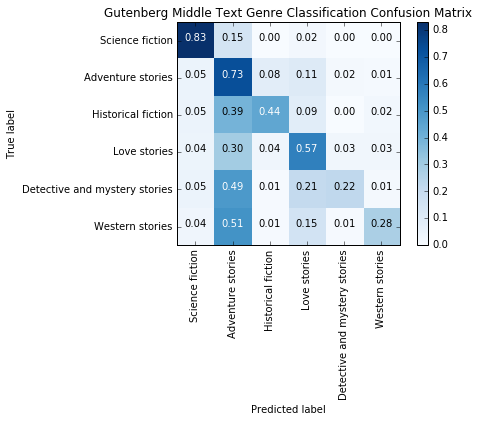

In [5]:
cnf_matrix = confusion_matrix(targets, predictions)
analysis_util.plot_confusion_matrix(cnf_matrix, classes=univ.subjects, normalize=True,
                      title='Gutenberg Middle Text Genre Classification Confusion Matrix')